## Software Comparison Project with NIDM-Results

This notebook demonstates how to reproduce the results presented in the second Software Comparison publication using NIDM-Results packs available at [NeuroVault (9324)](http://neurovault.org/collections/9324/). We give visual comparisons between axial slices of the excursion set images and T-statistics for each software packages, as well as quantitative comparisons with Euler characteristics, Bland-Altman plots and Dice coefficients.

In [12]:
import os
from subprocess import check_call
import zipfile
from nilearn import plotting
import shutil
import pandas as pd
from importlib import reload

### Download the NIDM-Results packs from NeuroVault

 - Query NeuroVault's API to retreive all NIDM packs in collection 9324
 - Download and save the packs in sub-folder `input/ds120/` 

In [13]:
from lib import download_data
reload(download_data)
download_data.download_data('9324', 'ds120', 'ds120')

downloading https://neurovault.org/collections/9324/spm_0001.nidm.zip at ./input/ds120/spm_0001.nidm.zip
downloading http://neurovault.org/media/images/9324/mask.nii.gz at /Users/maullz/Desktop/SC2/figures/input/ds120/afni_mask.nii.gz
downloading http://neurovault.org/media/images/9324/Positive_clustered_f_stat.nii.gz at /Users/maullz/Desktop/SC2/figures/input/ds120/afni_exc_set_pos.nii.gz
downloading http://neurovault.org/media/images/9324/Group_f_stat_masked.nii.gz at /Users/maullz/Desktop/SC2/figures/input/ds120/afni_stat.nii.gz


In [14]:
study = 'ds120'

# *** SPM group activations
spm_pack = open('./input/' + study + '/spm_0001.nidm.zip', 'rb')
z = zipfile.ZipFile(spm_pack)
z.extract('ExcursionSet.nii.gz', './input/' + study + '/')
z.extract('Mask.nii.gz', './input/' + study + '/')
z.extract('FStatistic.nii.gz', './input/' + study + '/')

# Thresholded statistics
spm_exc_set_file = './input/' + study + '/spm_exc_set.nii.gz'
shutil.move('./input/' + study + '/ExcursionSet.nii.gz', spm_exc_set_file)

# Unthresholded statistics
spm_stat_file = './input/' + study + '/spm_stat.nii.gz'
shutil.move('./input/' + study + '/FStatistic.nii.gz', spm_stat_file)

# Analysis mask
spm_mask_file = './input/' + study + '/spm_mask.nii.gz'
shutil.move('./input/' + study + '/Mask.nii.gz', spm_mask_file)

# *** AFNI group activations and deactivations
afni_mask_file = './input/' + study + '/afni_mask.nii.gz'
afni_exc_set_file = './input/' + study + '/afni_exc_set_pos.nii.gz'
afni_stat_file = './input/' + study + '/afni_stat.nii.gz'

exc_sets = dict()
exc_sets["spm"] = (spm_mask_file, spm_exc_set_file, spm_stat_file)
exc_sets["afni"] = (afni_mask_file, afni_exc_set_file, afni_stat_file)

# Euler Characteristics
afni_euler_chars = pd.read_csv('./input/' + study + '/afni_euler_chars.csv', header=None, names=['Threshold','AFNI EC'])
spm_euler_chars = pd.read_csv('./input/' + study + '/spm_euler_chars.csv', usecols=[1], header=None, names=['SPM EC'])
afni_cluster_count = pd.read_csv('./input/' + study + '/afni_cluster_count.csv', usecols=[1], names=['AFNI Cluster Count'])
spm_cluster_count = pd.read_csv('./input/' + study + '/spm_cluster_count.csv', usecols=[1], names=['SPM Cluster Count'])
euler_chars = pd.concat([afni_euler_chars, spm_euler_chars, afni_cluster_count, spm_cluster_count], axis=1)

# R^2 images
#afni_r_squared = './input/' + study + '/afni_r_squared.nii.gz'
#spm_r_squared = './input/' + study + '/spm_r_squared.nii.gz'

- Downloading this study's results from the 'Exploring the impact of analysis software on task fMRI results' manuscript 
- Query NeuroVault's API to retreive all NIDM packs in collection 8468
- Download and save the packs in sub-folder `input/ds120/` 

In [15]:
from lib import download_old_data
reload(download_old_data)
download_old_data.download_old_data('8468', 'ds120', 'ds120')

downloading https://neurovault.org/collections/8468/spm_0001.nidm.zip at ./input/ds120/old_spm_0001.nidm.zip
downloading http://neurovault.org/media/images/8468/mask.nii.gz at /Users/maullz/Desktop/SC2/figures/input/ds120/old_afni_mask.nii.gz
downloading http://neurovault.org/media/images/8468/Positive_clustered_f_stat.nii.gz at /Users/maullz/Desktop/SC2/figures/input/ds120/old_afni_exc_set_pos.nii.gz
downloading http://neurovault.org/media/images/8468/Group_f_stat_masked.nii.gz at /Users/maullz/Desktop/SC2/figures/input/ds120/old_afni_stat.nii.gz


In [16]:
# *** SPM group activations
spm_pack = open('./input/' + study + '/spm_0001.nidm.zip', 'rb')
z = zipfile.ZipFile(spm_pack)
z.extract('ExcursionSet.nii.gz', './input/' + study + '/')
z.extract('Mask.nii.gz', './input/' + study + '/')
z.extract('FStatistic.nii.gz', './input/' + study + '/')

# Thresholded statistics
old_spm_exc_set_file = './input/' + study + '/old_spm_exc_set.nii.gz'
shutil.move('./input/' + study + '/ExcursionSet.nii.gz', old_spm_exc_set_file)

# Unthresholded statistics
old_spm_stat_file = './input/' + study + '/old_spm_stat.nii.gz'
shutil.move('./input/' + study + '/FStatistic.nii.gz', old_spm_stat_file)

# Analysis mask
old_spm_mask_file = './input/' + study + '/old_spm_mask.nii.gz'
shutil.move('./input/' + study + '/Mask.nii.gz', old_spm_mask_file)

# *** AFNI group activations and deactivations
old_afni_mask_file = './input/' + study + '/old_afni_mask.nii.gz'
old_afni_exc_set_file = './input/' + study + '/old_afni_exc_set_pos.nii.gz'
old_afni_stat_file = './input/' + study + '/old_afni_stat.nii.gz'

old_exc_sets = dict()
old_exc_sets["spm"] = (old_spm_mask_file, old_spm_exc_set_file, old_spm_stat_file)
old_exc_sets["afni"] = (old_afni_mask_file, old_afni_exc_set_file, old_afni_stat_file)

/Users/maullz/anaconda2/envs/python3/lib/python3.8/site-packages/nilearn/plotting/displays.py:1595: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([fraction * index * (x1 - x0) + x0, y0,


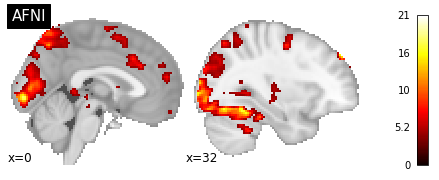

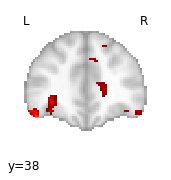

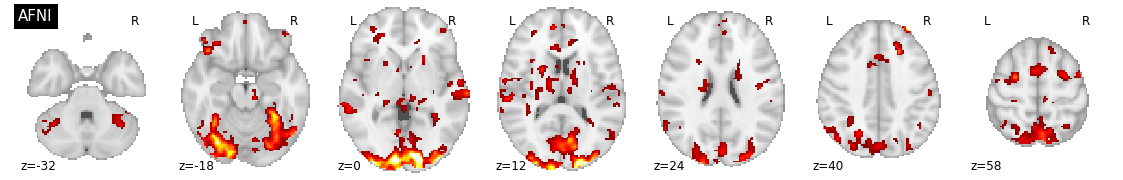

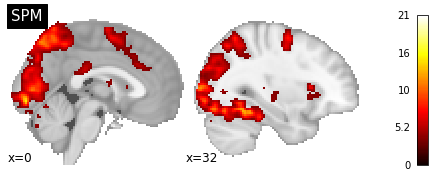

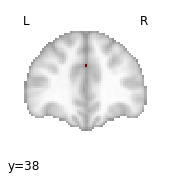

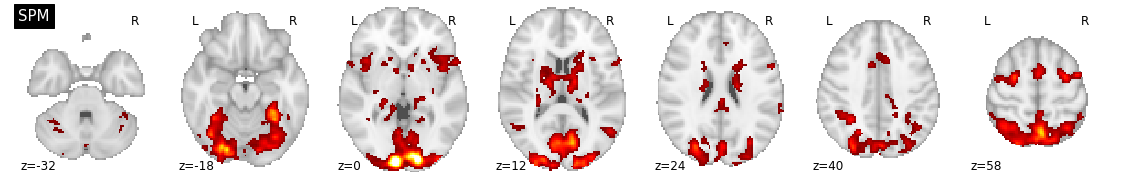

In [17]:
from lib import plot_excursion_sets
# Determine the scale of the activation colorbar
max_activation=21
# Determine the coordinates of the x, y, and z axial slices to be displayed
x_coords=[0, 32]
y_coords=[38]
z_coords=[-32, -18, 0, 12, 24, 40, 58]

plot_excursion_sets.plot_excursion_sets(exc_sets, max_activation, x_coords, y_coords, z_coords)

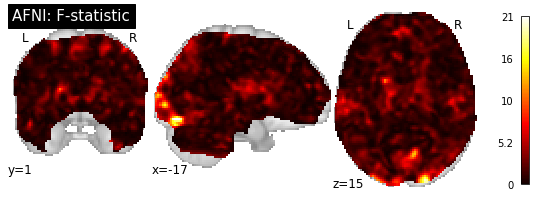

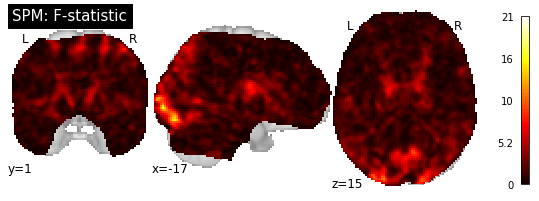

In [18]:
from lib import plot_stat_images
max_activation=21
plot_stat_images.plot_stat_images(afni_stat_file, spm_stat_file, max_activation, [-17, 1, 15], 'F-statistic')

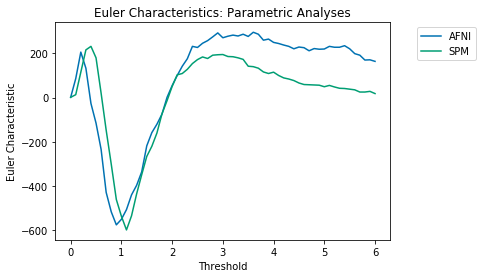

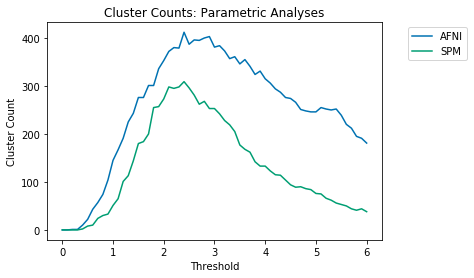

In [19]:
from lib import euler_characteristics
euler_characteristics.euler_characteristics(euler_chars, 'Parametric Analyses')

/Users/maullz/Desktop/SC2/figures/lib/bland_altman.py:98: RuntimeWarning: invalid value encountered in greater_equal
  white_matter_mask = white_matter >= 0.5
/Users/maullz/Desktop/SC2/figures/lib/bland_altman.py:100: RuntimeWarning: invalid value encountered in greater_equal
  csf_mask = csf >= 0.5
/Users/maullz/Desktop/SC2/figures/lib/bland_altman.py:98: RuntimeWarning: invalid value encountered in greater_equal
  white_matter_mask = white_matter >= 0.5
/Users/maullz/Desktop/SC2/figures/lib/bland_altman.py:100: RuntimeWarning: invalid value encountered in greater_equal
  csf_mask = csf >= 0.5


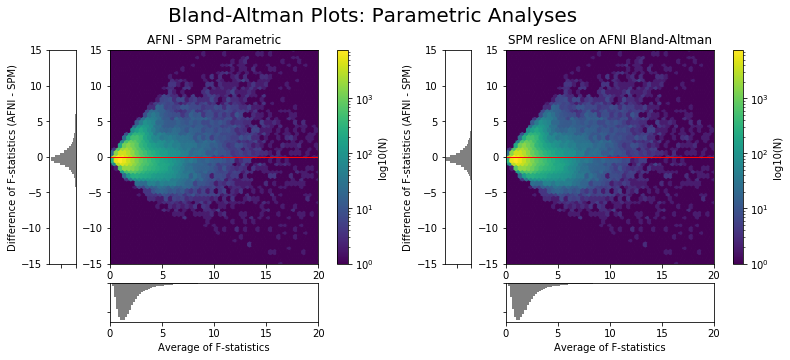

Mean =  -0.05278852 , Standard Devation =  1.5215702 , Correlation Coefficient =  0.7400344871333779


In [20]:
from lib import bland_altman
bland_altman.bland_altman('Bland-Altman Plots: Parametric Analyses', afni_stat_file, spm_stat_file,
             'AFNI - SPM Parametric', study=study)

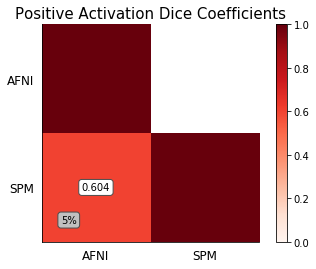

In [21]:
from lib import dice
dice.dice(afni_exc_set_file, spm_exc_set_file, study=study,
         afni_stat_file=afni_stat_file, spm_stat_file=spm_stat_file)